# EO-tilematcher - 101

The aim of eo-tilematcher is to just show the tiles (Path-Row on Landsat speech) hitted by a certain geometry. Just That.

In [9]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from eo_tilematcher.eo_tilematcher import intersects,get_spacecraft_db
#
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#helper
def get_dfgeom_xy(df):
    return [(x,y) for x,y in zip(df.geometry.centroid.x.values,df.geometry.centroid.y.values)]    

In [3]:
# Pick some ROI of interest
gpd_roi=gpd.read_file('../data/ezequiel-ramos-mexia-dam.geojson')

## Sentinel 2

In [4]:
sentinel_match = intersects("sentinel2",gpd_roi )
# In the following we get some extra results just for display
display(sentinel_match)
# get the sentinel2 tiles definition (for plots only)
sentinel2_tiles=get_spacecraft_db('sentinel2')
# match_polygon is left as str in the intersection call, so we have to load it as a WKT
sentinel_match['match_polygon']=sentinel_match['match_polygon'].apply(lambda x: wkt.loads(x))

,geometry,match_polygon,match,TILE
0,"POLYGON ((-69.33472 -39.65857, -68.64944 -39.6...",POLYGON ((-68.8868917710754118 -39.24182610848...,partial,19HDS
1,"POLYGON ((-69.33472 -39.65857, -68.64944 -39.6...",POLYGON ((-69.0002331579371031 -39.65857056750...,partial,19HES


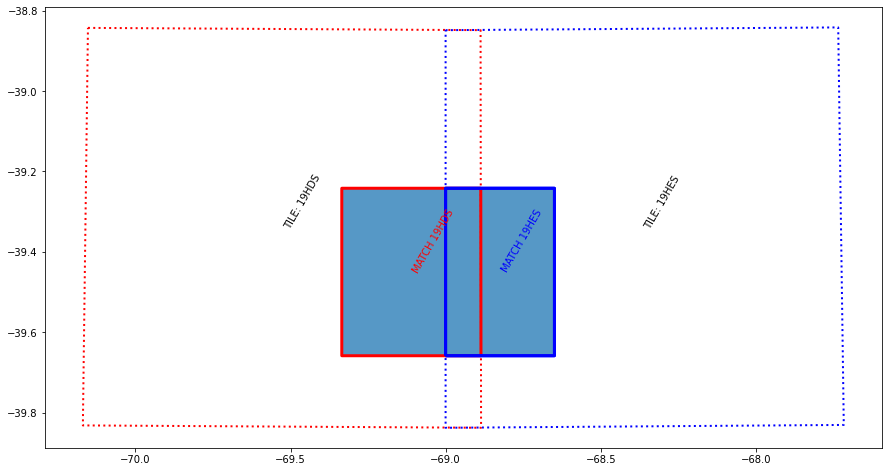

In [5]:
f,ax=plt.subplots(1,1,figsize=(15,15))
sentinel_match.plot(ax=ax,edgecolor='None',alpha=0.5)
#
sentinel2_tiles[sentinel2_tiles.TILE=='19HDS'].plot(ax=ax,facecolor='None',edgecolor='r',lw=2,ls=':')
sentinel_match.iloc[[0]].set_geometry('match_polygon').plot(ax=ax,facecolor='None',edgecolor='r',lw=3)
xy=get_dfgeom_xy(sentinel2_tiles[sentinel2_tiles.TILE=='19HDS'])[0]
ax.text(*xy,'TILE: 19HDS',rotation=60)
xy=get_dfgeom_xy(sentinel_match.iloc[[0]].set_geometry('match_polygon'))[0]
ax.text(*xy,'MATCH 19HDS',rotation=60,color='r')
#
sentinel2_tiles[sentinel2_tiles.TILE=='19HES'].plot(ax=ax,facecolor='None',edgecolor='b',lw=2,ls=':')
sentinel_match.iloc[[1]].set_geometry('match_polygon').plot(ax=ax,facecolor='None',edgecolor='b',lw=3)
xy=get_dfgeom_xy(sentinel2_tiles[sentinel2_tiles.TILE=='19HES'])[0]
ax.text(*xy,'TILE: 19HES',rotation=60)

sentinel_match.iloc[[1]].set_geometry('match_polygon').plot(ax=ax,facecolor='None',edgecolor='b',lw=3)
xy=get_dfgeom_xy(sentinel_match.iloc[[1]].set_geometry('match_polygon'))[0]
ax.text(*xy,'MATCH 19HES',rotation=60,color='b');

As you may noticed:
- __geometry column__: is the requested geometry to be matched against satellite tiles
- __match_polygon__: is the intersection/contains WKT geometry (string) that matches each satellite tile 
- __match__: partial/total (str). total indicates a _contains_ conditition
- __TILE__: the satellite tile matched in __match__ condition (Sentinel convention).

## Landsat 8

In [6]:
# pick the spacecraft and get the results
landsat_match = intersects("landsat8",gpd_roi )
# In the following we get some extra results just for display
display(landsat_match)
# get the landsat8 Path-Row Definition (for plots only)
landsat_tiles=get_spacecraft_db('landsat8')
# match_polygon is left as str in the intersection call, so we have to load it as a WKT
landsat_match['match_polygon']=landsat_match['match_polygon'].apply(lambda x: wkt.loads(x))

,geometry,match_polygon,match,PATH#ROW
0,"POLYGON ((-69.33472 -39.65857, -68.64944 -39.6...",POLYGON ((-69.3347167968750000 -39.65857056750...,total,231#087


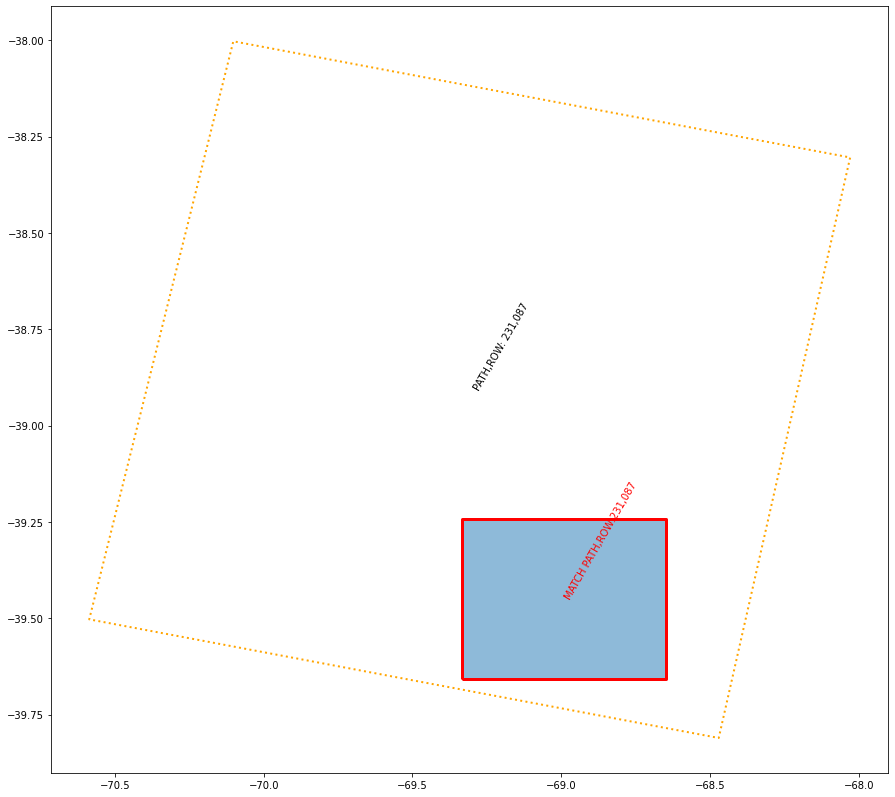

In [7]:
f,ax=plt.subplots(1,1,figsize=(15,15))
landsat_match.plot(ax=ax,edgecolor='None',alpha=0.5)
#
landsat_tiles[landsat_tiles['PATH#ROW']=='231#087'].plot(ax=ax,facecolor='None',edgecolor='orange',lw=2,ls=':')
landsat_match.set_geometry('match_polygon').plot(ax=ax,facecolor='None',edgecolor='r',lw=3)
xy=get_dfgeom_xy(landsat_tiles[landsat_tiles['PATH#ROW']=='231#087'])[0]
ax.text(*xy,'PATH,ROW: 231,087',rotation=60)
xy=get_dfgeom_xy(landsat_match.set_geometry('match_polygon'))[0]
ax.text(*xy,'MATCH PATH,ROW:231,087',rotation=60,color='r');

As you may noticed:
- __geometry column__: is the requested geometry to be matched against satellite tiles
- __match_polygon__: is the intersection/contains WKT geometry (string) that matches each satellite tile 
- __match__: partial/total (str). total indicates a _contains_ conditition
- __PATH#ROW__: the satellite tile (path,row) matched in __match__ condition (Landsat convention).